In [1]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    #output=function3("this is function 3 in between")
    return input2 + " and Amar from second function" 

In [2]:
from langgraph.graph import Graph

In [3]:
#create workflow
workflow1=Graph()

In [4]:
#Add node into the workflow
workflow1.add_node("fn1", function1) #fn1 - custom name of the fn

In [5]:
#workflow 2
#Add another fn in workflow2
workflow1.add_node("fn2",function2)

In [6]:
#Adding edges - From function1 to function2
workflow1.add_edge("fn1","fn2")


In [7]:
#Create an entry point 
workflow1.set_entry_point("fn1")


In [8]:
workflow1.set_finish_point("fn2") 

In [9]:
app = workflow1.compile()

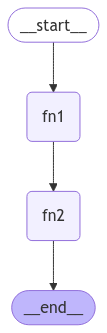

In [10]:
#Graph Visualization
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [11]:
app.invoke("Hi Iam Amarnath ")

'Hi Iam Amarnath from first function and Amar from second function'

In [12]:
input = "Hi Iam Amarnath "

In [13]:
#Stream of output
for output in app.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fn1
_______
Hi Iam Amarnath from first function


here is output from fn2
_______
Hi Iam Amarnath from first function and Amar from second function




In [14]:
def funct3(input3):
    return input3

In [15]:
def funct1(input1):
    return input1 + "from first function"

def funct2(input2):
    output=funct3("this is function 3 in between")
    return input2 + " " + output + " and Amar from second function" 

In [16]:
from langgraph.graph import Graph

workflow2=Graph()

workflow2.add_node("fnc1", funct1)
workflow2.add_node("fnc2", funct2)

workflow2.add_edge("fnc1","fnc2")


In [17]:
workflow2.set_entry_point("fnc1")

In [18]:
workflow2.set_finish_point("fnc2")

In [19]:
app1=workflow2.compile()

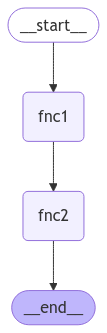

In [20]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [21]:
app1.invoke("hi this is Amarnath D ")



'hi this is Amarnath D from first function this is function 3 in between and Amar from second function'

In [22]:
input = "AMARNATH "

In [23]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fnc1
_______
AMARNATH from first function


here is output from fnc2
_______
AMARNATH from first function this is function 3 in between and Amar from second function




In [24]:
 #Let's create a workflow with LLM
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content

c:\Users\Toshiba\anaconda3\envs\langgraphe2e\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'Hello there! How can I assist you today?'

In [25]:
def func_1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
    response=llm.invoke(input).content
    return response

In [26]:
def func_2(input):
    upper_case=input.upper()
    return upper_case

In [27]:
from langgraph.graph import Graph
workflow3=Graph()

In [28]:
workflow3.add_node("llm_fn1",func_1)

In [29]:
workflow3.add_node("upper_cast_fn2",func_2)

In [30]:
workflow3.add_edge("llm_fn1","upper_cast_fn2")

In [31]:
workflow3.set_entry_point("llm_fn1")
workflow3.set_finish_point("upper_cast_fn2")

In [32]:
app2 = workflow3.compile()

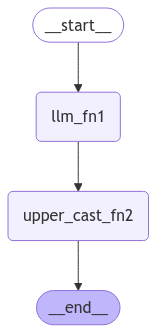

In [33]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [34]:
app2.invoke("Roger Federer is famous for?")

'TENNIS'

In [35]:
app2.invoke("who is Roger Federer , give a glimpse about him?")

'**ROGER FEDERER**\n\n**BIOGRAPHY:**\n\n* BORN ON AUGUST 8, 1981, IN BASEL, SWITZERLAND\n* WIDELY CONSIDERED ONE OF THE GREATEST TENNIS PLAYERS OF ALL TIME\n* HOLDS THE RECORD FOR THE MOST GRAND SLAM SINGLES TITLES AMONG MEN (20)\n* HAS BEEN RANKED WORLD NO. 1 FOR A RECORD 237 CONSECUTIVE WEEKS\n* KNOWN FOR HIS ELEGANT PLAYING STYLE, PRECISION SHOT-MAKING, AND ALL-COURT VERSATILITY\n\n**CAREER HIGHLIGHTS:**\n\n* WON 103 ATP SINGLES TITLES, INCLUDING 20 GRAND SLAMS:\n    * AUSTRALIAN OPEN: 6 (2004, 2006, 2007, 2010, 2017, 2018)\n    * WIMBLEDON: 8 (2003, 2004, 2005, 2006, 2007, 2009, 2012, 2017)\n    * US OPEN: 5 (2004, 2005, 2006, 2007, 2008)\n    * FRENCH OPEN: 1 (2009)\n* WON 8 DOUBLES TITLES, INCLUDING 1 GRAND SLAM (AUSTRALIAN OPEN 2017)\n* REPRESENTED SWITZERLAND IN 4 OLYMPIC GAMES, WINNING A GOLD MEDAL IN DOUBLES (2008) AND A SILVER MEDAL IN SINGLES (2012)\n* LED SWITZERLAND TO ITS FIRST DAVIS CUP TITLE IN 2014\n\n**STYLE OF PLAY:**\n\n* KNOWN FOR HIS ATTACKING STYLE AND ABILITY T

In [36]:
print(app2.invoke("who is Roger Federer , give a glimpse about him?"))

**ROGER FEDERER**

**OVERVIEW:**

ROGER FEDERER IS WIDELY REGARDED AS ONE OF THE GREATEST TENNIS PLAYERS OF ALL TIME. WITH 20 GRAND SLAM SINGLES TITLES, HE HOLDS THE RECORD FOR THE MOST MEN'S GRAND SLAMS. KNOWN FOR HIS ELEGANT STYLE, PRECISION SHOTS, AND LONGEVITY, FEDERER HAS CAPTIVATED TENNIS FANS AROUND THE WORLD FOR OVER TWO DECADES.

**EARLY LIFE AND CAREER:**

* BORN ON AUGUST 8, 1981, IN BASEL, SWITZERLAND
* BEGAN PLAYING TENNIS AS A CHILD AND SHOWED EXCEPTIONAL TALENT
* TURNED PROFESSIONAL IN 1998 AT THE AGE OF 16
* WON HIS FIRST GRAND SLAM TITLE AT WIMBLEDON IN 2003

**MAJOR ACCOMPLISHMENTS:**

* 20 GRAND SLAM SINGLES TITLES: 8 WIMBLEDON, 6 AUSTRALIAN OPEN, 5 US OPEN, 1 FRENCH OPEN
* 310 WEEKS AT WORLD NO. 1
* 103 ATP SINGLES TITLES
* 6 ATP WORLD TOUR FINALS TITLES
* OLYMPIC GOLD MEDALS IN DOUBLES (2008) AND SILVER IN SINGLES (2012)

**PLAYING STYLE:**

FEDERER IS RENOWNED FOR HIS ALL-COURT GAME. HIS POWERFUL SERVE, PRECISION GROUNDSTROKES, AND EXCEPTIONAL FOOTWORK ALLOW HIM T

In [37]:
 #Stream of output

que = "who is Roger Federer , give a glimpse about him?"


In [38]:
for output in app2.stream(que):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm_fn1
_______
**Roger Federer**

**Personal Life:**

* Born: August 8, 1981, in Basel, Switzerland
* Nationality: Swiss
* Wife: Mirka Federer
* Children: Four (two sets of twins)

**Tennis Career:**

**Grand Slam Titles:** 20
* Australian Open: 6
* French Open: 1
* Wimbledon: 8
* US Open: 5

**Other Notable Achievements:**

* ATP World Tour Finals (6): 2003, 2004, 2006, 2007, 2010, 2011
* ATP Masters 1000 titles (28)
* Davis Cup champion (2014)
* Olympic gold medalist in doubles (2008)
* Spent a record 237 consecutive weeks at world No. 1
* Held the world No. 1 ranking for a record 310 weeks in total

**Style of Play:**

* Known for his elegant, finesse-based game
* Exceptional footwork and court coverage
* Powerful serve and precise groundstrokes
* Masterful use of slice and drop shots

**Legacy:**

* Widely considered one of the greatest tennis players of all time
* Known for his longevity, consistency, and sportsmanship
* Inspired a generation of tennis players

In [39]:
#Let's create an own output token counter

def func_3(user_input):
    token=user_input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number



In [40]:
workflow4=Graph()
workflow4.add_node("llm_fnc",func_1)
workflow4.add_node("token_counter_fnc",func_3)
workflow4.add_edge("llm_fnc","token_counter_fnc")
workflow4.set_entry_point("llm_fnc")
workflow4.set_finish_point("token_counter_fnc")
app3=workflow4.compile()

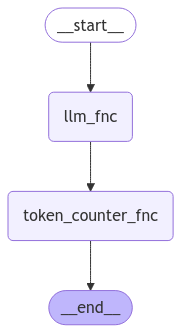

In [41]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [42]:
app3.invoke("who won the T20 men world cup in 2007?")

'total token number is 1'

In [43]:
app3.invoke("Explain Agentic AI in short?")

'total token number is 78'

In [4]:
#Let's implement a RAG pipeline

from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

c:\Users\Toshiba\anaconda3\envs\langgraphe2e\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

In [6]:
llm.invoke("hi").content

'Hello there! How can I assist you today?'

In [7]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [8]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [9]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [10]:
query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_7732\1985905.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': '..\\data\\llama3.txt'}
Alongside the release of Llama 3, Meta added virtual assistant features to Facebook and WhatsApp in
page_content='Alongside the release of Llama 3, Meta added virtual assistant features to Facebook and WhatsApp in' metadata={'source': '..\\data\\llama3.txt'}
page_content='by Meta AI starting in February 2023.[2][3] The latest version is Llama 3 released in April' metadata={'source': '..\\data\\llama3.txt'}
page_content='Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.[7]' metadata={'source': '..\\data\\llama3.txt'}


In [11]:
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [17]:
AgentState = {} # empty dictionary

In [18]:
AgentState["messages"]=[]

In [19]:
AgentState

{'messages': []}

In [20]:
AgentState["messages"].append("hi, how are you?")

In [21]:
AgentState

{'messages': ['hi, how are you?']}

In [22]:
AgentState["messages"].append("hi, what you doing?")

In [23]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [12]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [13]:
# Define a Langchain graph
from langgraph.graph import Graph

workflow4 = Graph()

workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)

workflow4.add_edge('LLM', 'RAGtool')

workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")

app4 = workflow4.compile()

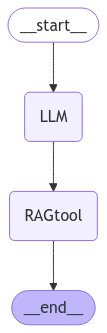

In [14]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [15]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [16]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about llama3 model', 'LLaMA-3 (Large Language Model Architecture 3) is a large language model developed by Meta AI.']}

---

Output from node 'RAGtool':
---
Llama 3 is a large language model developed by Meta AI. It has been compared favorably against other large language models, such as GPT-3 and Claude, in most benchmarks. The 8B parameter version of Llama 3 has been described as "surprisingly capable" given its size.

---



In [25]:
#Let's implement a Level 4 pipeline with conditional workflow and state graph

loader2=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)
docs2=loader2.load()

text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]

In [26]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [27]:
query = "Tell me about India's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data2\\indian_economy.txt'}
India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s strong export sectors—including textiles, IT services, and automotive manufacturing—had' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s last eight years of GDP (hypothetical data):' metadata={'source': '..\\data2\\indian_economy.txt'}


In [28]:
query = "Tell me about India's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data2\\indian_economy.txt'}
India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s strong export sectors—including textiles, IT services, and automotive manufacturing—had' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s last eight years of GDP (hypothetical data):' metadata={'source': '..\\data2\\indian_economy.txt'}


In [29]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [30]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [31]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [32]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [33]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [51]:
state = {"messages": ["Tell me about India's Industrial Growth?"]}

In [52]:
function_1(state)

Tell me about India's Industrial Growth?
Topic='India' Reasoning="The user query is about India's Industrial Growth."


{'messages': ['India']}

In [34]:
#route function
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'India' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [35]:
#RAG
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [36]:
#LLM 
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [37]:
AgentState

__main__.AgentState

In [38]:
#Workflow

from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)
workflow5.add_node("RAG", function_2)
workflow5.add_node("LLM", function_3)

workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
     router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)
workflow5.add_edge("LLM",END)


app5=workflow5.compile()

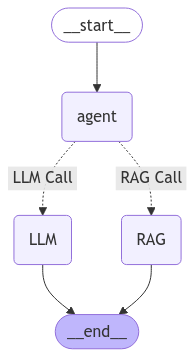

In [39]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [43]:
inputs = {"messages": ["yearwise india's GDP?"]}

In [44]:
output = app5.invoke(inputs)

yearwise india's GDP?
Topic='India' Reasoning="The user query is asking about India's GDP, which is related to India."
-> Router ->
India
-> Calling RAG ->
yearwise india's GDP?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [45]:
output

{'messages': ["yearwise india's GDP?",
  'India',
  '| Year | GDP |\n|---|---|\n| 2022 | $3,517.24B |\n| 2021 | $3,173.04B |\n| 2020 | $2,935.57B |\n| 2019 | $2,869.45B |\n| 2018 | $2,715.50B |']}

In [48]:
inputs = {"messages": ["Tajmahal is located in which city?"]}

In [49]:
output = app5.invoke(inputs)

Tajmahal is located in which city?
Topic='India' Reasoning='The query is about Tajmahal, which is located in India.'
-> Router ->
India
-> Calling RAG ->
Tajmahal is located in which city?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [50]:
output

{'messages': ['Tajmahal is located in which city?',
  'India',
  'The provided context does not mention anything about the Tajmahal or its location, so I cannot answer this question from the provided context.']}